In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pickle

from experimentation import ExperimentAnalyzer
import os
import time
import pandas as pd

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2

In [3]:
files = [x for x in os.listdir('pickles') if x.endswith('pkl')]


print(files)

['BobstrapEnsemble_toy_True_5.pkl', 'BootstrapEnsemble_toy_True_5.pkl', 'DropoutModel_toy_True_5.pkl', 'SaverModel_toy_True_5.pkl', 'VanillaEnsemble_toy_True_5.pkl']


import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pickle

from experimentation import ExperimentAnalyzer
import os
import time
import pandas as pd
files = [x for x in os.listdir('pickles') if x.endswith('pkl')]


for file in files:
    with  open('pickles\\'+file, "rb") as f:
        exp = pickle.load(f)



    analyzer = ExperimentAnalyzer(exp)
    df1 = analyzer.analysis()
    print(f'{exp.model_name}')
    print(df1.describe().to_latex())
    analyzer.get_outlier_indices()
    analyzer.plot_outcomes()
    plt.figure()


    
    


0.49349080426497516 0.03677507087076646
0.3310257179964943 0.45683370672521706
0.18578687637531477 0.3267183170528345
0.26987239847316263 1.840697745270413
DropoutModel
\begin{tabular}{lrrrr}
\toprule
{} &      nlpd &    errors &    cobeau &  cobeau\_p\_vals \\
\midrule
count &  5.000000 &  5.000000 &  5.000000 &       5.000000 \\
mean  &  0.269872 &  0.493491 &  0.331026 &       0.185787 \\
std   &  2.057963 &  0.041116 &  0.510756 &       0.365282 \\
min   & -0.912512 &  0.450407 & -0.437161 &       0.000297 \\
25\%   & -0.863220 &  0.470750 &  0.054099 &       0.005300 \\
50\%   & -0.849326 &  0.473955 &  0.624145 &       0.007409 \\
75\%   &  0.102029 &  0.522684 &  0.643696 &       0.079308 \\
max   &  3.872390 &  0.549658 &  0.770349 &       0.836621 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

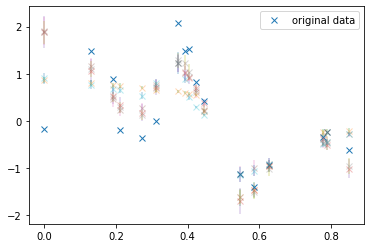

<Figure size 432x288 with 0 Axes>

In [10]:
file = files[2]
with  open('pickles\\'+file, "rb") as f:
    exp = pickle.load(f)



analyzer = ExperimentAnalyzer(exp)
df1 = analyzer.analysis()
print(f'{exp.model_name}')
print(df1.describe().to_latex())
analyzer.get_outlier_indices()
analyzer.plot_outcomes()
plt.figure()


0.49349080426497516 0.03677507087076646
0.3310257179964943 0.45683370672521706
0.18578687637531477 0.3267183170528345
0.26987239847316263 1.840697745270413
\begin{tabular}{lrrrr}
\toprule
{} &      nlpd &    errors &    cobeau &  cobeau\_p\_vals \\
\midrule
count &  5.000000 &  5.000000 &  5.000000 &       5.000000 \\
mean  &  0.269872 &  0.493491 &  0.331026 &       0.185787 \\
std   &  2.057963 &  0.041116 &  0.510756 &       0.365282 \\
min   & -0.912512 &  0.450407 & -0.437161 &       0.000297 \\
25\%   & -0.863220 &  0.470750 &  0.054099 &       0.005300 \\
50\%   & -0.849326 &  0.473955 &  0.624145 &       0.007409 \\
75\%   &  0.102029 &  0.522684 &  0.643696 &       0.079308 \\
max   &  3.872390 &  0.549658 &  0.770349 &       0.836621 \\
\bottomrule
\end{tabular}

0.49349080426497516 0.03677507087076646
0.3310257179964943 0.45683370672521706
0.18578687637531477 0.3267183170528345
0.26987239847316263 1.840697745270413


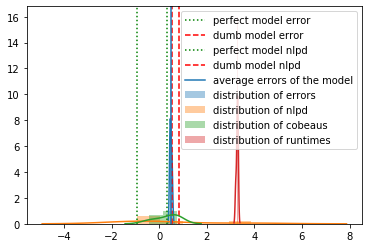

In [11]:
df2 = analyzer.analysis()
print(df2.describe().to_latex())

analyzer.plot_distribution_of_metrics()


    

5
3 0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.64it/s]


 this many models: (100, 100)


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2941.18it/s]


 this many models: (100, 100)


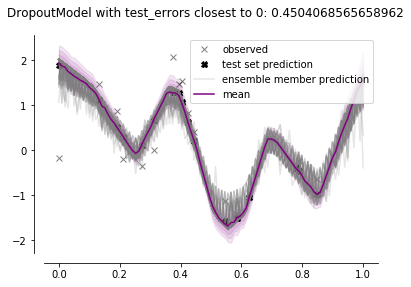

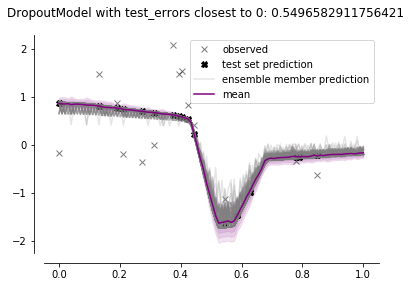

In [12]:
analyzer.plot_models()


5
4 1


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3571.50it/s]


 this many models: (100, 100)


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3225.99it/s]


 this many models: (100, 100)


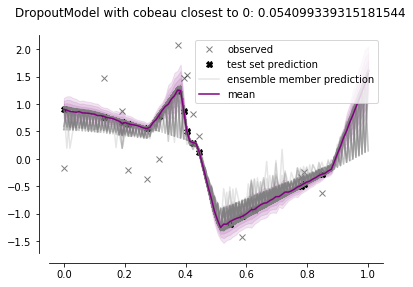

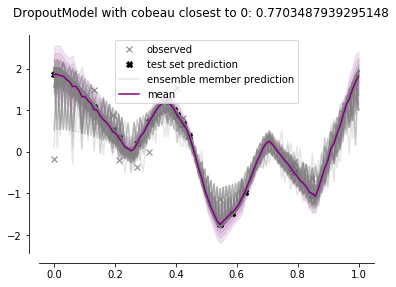

In [13]:
analyzer.plot_models('cobeau')


5
4 0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2631.82it/s]


 this many models: (100, 100)


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3125.11it/s]


 this many models: (100, 100)


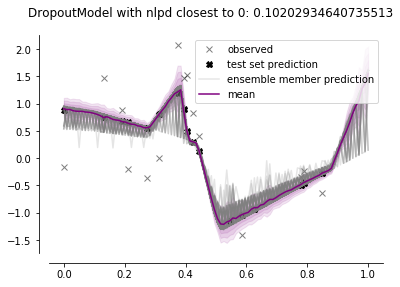

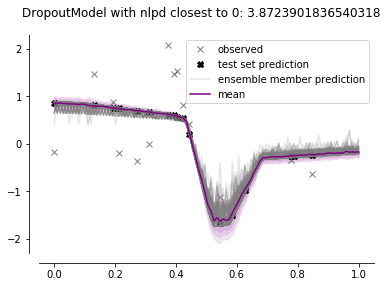

In [14]:
analyzer.plot_models('nlpd')



In [15]:
try:
    analyzer.plot_outlier_models()



except Exception as e:
    print(e)

number of outliers: 0


RuntimeError: libpng signaled error

<Figure size 1332x0 with 2 Axes>